In [1]:
# Linear Regression + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [2]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self

SVR_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('lin_SVR', LinearSVR())
                     ], verbose=True)

selectionObj = RFECV(SVR_pipeline, min_features_to_select=11, step=10, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting estimator with 311 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.5s
[Pipeline] ........... (step 2 of 2) Processing lin_SVR, total=   5.7s
Fitting estimator with 301 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ........... (step 2 of 2) Processing lin_SVR, total=   5.2s
Fitting estimator with 291 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ........... (step 2 of 2) Processing lin_SVR, total=   5.2s
Fitting estimator with 281 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ........... (step 2 of 2) Processing lin_SVR, total=   5.0s
Fitting estimator with 271 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.3s
[Pipeline] ........... (step 2 of 2) Processing lin_SVR, total=   4.7s
Fitting estimator with 261 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.

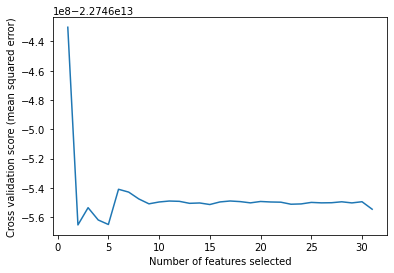

In [3]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(1, len(selectionObj.grid_scores_) + 1), selectionObj.grid_scores_)
plt.show()

In [4]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

Index(['powerPS', 'kilometer', 'brand_porsche', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_limousine',
       'vehicleType_suv', 'fuelType_diesel', 'model_911',
       'yearOfRegistration'],
      dtype='object')


In [7]:
#Making predictions on the Test Set
y_pred = selectionObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

124164992741.6133


In [9]:
print(selectionObj.ranking_)

AttributeError: 'RFECV' object has no attribute 'ranking_'